In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('./rlcard'))

In [5]:
import numpy as np

import rlcard
from rlcard.agents import CFRAgent, RandomAgent
from rlcard import models
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [6]:
# Make environment and enable human mode
env = rlcard.make('kuhn-poker', config={'seed': 0, 'allow_step_back':True})
eval_env = rlcard.make('kuhn-poker', config={'seed': 0})

In [7]:
# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100  # evaluate every 100 episodes
evaluate_num = 10000  # number of evaluation episodes/runs/hands
episode_num = 10000   # number of training episodes (hands?)

# The paths for saving the logs and learning curves
log_dir = './experiments/kuhn_poker_cfr_result/'

# Set a global seed
set_global_seed(0)

# Initilize CFR Agent
agent = CFRAgent(env)
agent.load()  # If we have saved model, we first load the model

# Evaluate CFR against pre-trained NFSP
eval_env.set_agents([agent, RandomAgent(action_num=eval_env.action_num)])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

* Now we start to train CFR on Lecuc Hold'em. The training logs and the learning curves are shown as below.

In [8]:
for episode in range(episode_num):
    agent.train()
    print('\rIteration {}'.format(episode), end='')
    # Evaluate the performance. Play with NFSP agents.
    if episode % evaluate_every == 0:
        agent.save() # Save model
        # return of tournament is average payoff for each
        # env.timestep counts each step/action
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

Iteration 0
----------------------------------------
  timestep     |  20
  reward       |  -0.1041
----------------------------------------
Iteration 100
----------------------------------------
  timestep     |  2020
  reward       |  0.4634
----------------------------------------
Iteration 200
----------------------------------------
  timestep     |  4020
  reward       |  0.3665
----------------------------------------
Iteration 300
----------------------------------------
  timestep     |  6020
  reward       |  0.358
----------------------------------------
Iteration 400
----------------------------------------
  timestep     |  8020
  reward       |  0.3613
----------------------------------------
Iteration 500
----------------------------------------
  timestep     |  10020
  reward       |  0.3418
----------------------------------------
Iteration 600
----------------------------------------
  timestep     |  12020
  reward       |  0.3457
-----------------------------------

Iteration 5700
----------------------------------------
  timestep     |  114020
  reward       |  0.3569
----------------------------------------
Iteration 5800
----------------------------------------
  timestep     |  116020
  reward       |  0.3139
----------------------------------------
Iteration 5900
----------------------------------------
  timestep     |  118020
  reward       |  0.348
----------------------------------------
Iteration 6000
----------------------------------------
  timestep     |  120020
  reward       |  0.3342
----------------------------------------
Iteration 6100
----------------------------------------
  timestep     |  122020
  reward       |  0.3246
----------------------------------------
Iteration 6200
----------------------------------------
  timestep     |  124020
  reward       |  0.3241
----------------------------------------
Iteration 6300
----------------------------------------
  timestep     |  126020
  reward       |  0.3308
-------------

./experiments/kuhn_poker_cfr_result/performance.csv


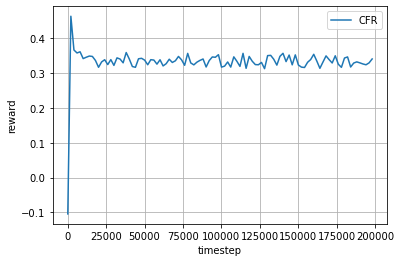

In [9]:
# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('CFR')

### Good job! Now you have your trained CFR agent on Leduc Hold'em!